PCA의 목적은 원 데이터(original data)의 분산을 최대한 보존하는 축을 찾아 투영(projection)하는 것이다.

출처: https://excelsior-cjh.tistory.com/167 [EXCELSIOR]

In [2]:
import pickle
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib
import pandas as pd

In [3]:
with open("pca_card_data","rb") as fr:
    data = pickle.load(fr)
print(data)

            f_CNT35057065  f_AMT35057065  m_CNT35057065  m_AMT35057065  \
STD_DD                                                                   
2018-04-01           7567         228766          12723         388071   
2018-04-02          19392         893713          25402        1172022   
2018-04-03          15005         594205          21476         807775   
2018-04-04          15068         579159          21689         860339   
2018-04-05          12340         514633          18730         737513   
2018-04-06          13435         502218          20246         757730   
2018-04-07          11151         414453          17009         612769   
2018-04-08           6867         235177          11601         406029   
2018-04-09          15017         513028          22209         836515   
2018-04-10          16921         663361          22872         944244   
2018-04-11          14634         571499          20940         774593   
2018-04-12          14152         5930

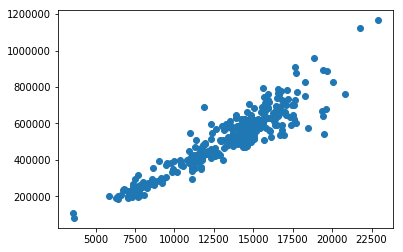

In [3]:
plt.scatter(data['f_CNT11065065'],data['f_AMT11065065'])

C:\ProgramData\Anaconda3\envs\finance\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


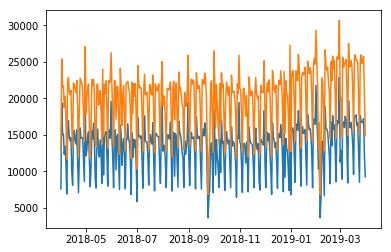

In [4]:
plt.plot(data['f_CNT11065065'])
plt.plot(data['m_CNT11065065'])

In [5]:
data.columns

Index(['f_CNT35057065', 'f_AMT35057065', 'm_CNT35057065', 'm_AMT35057065',
       'f_CNT35057035', 'f_AMT35057035', 'm_CNT35057035', 'm_AMT35057035',
       'f_CNT35057040', 'f_AMT35057040',
       ...
       'm_CNT35070025', 'm_AMT35070025', 'f_CNT35070060', 'f_AMT35070060',
       'm_CNT35070060', 'm_AMT35070060', 'f_CNT35070030', 'f_AMT35070030',
       'm_CNT35070030', 'm_AMT35070030'],
      dtype='object', length=1440)

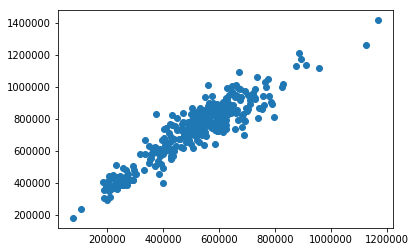

In [6]:
plt.scatter(data['f_AMT11065065'],data['m_AMT11065065'])

In [7]:
data_before = np.array(data)

In [8]:
data_before.shape

(365, 1440)

In [9]:
# scailing
scaler = StandardScaler()
scaler.fit(data_before)
scaling_data = scaler.transform(data_before)
scaling_data

C:\ProgramData\Anaconda3\envs\finance\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\envs\finance\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-1.74478947e+00, -1.70546543e+00, -1.82427608e+00, ...,
        -5.05420220e-01, -8.49373630e-01, -2.36154779e-01],
       [ 1.85433700e+00,  2.33475392e+00,  1.31328840e+00, ...,
         2.52204807e+00,  1.01031644e+00,  1.57108907e+00],
       [ 5.19083909e-01,  5.14942691e-01,  3.41754515e-01, ...,
         1.54295012e-01, -4.76647303e-02, -7.96095401e-01],
       ...,
       [ 1.18960193e+00,  1.36973289e+00,  1.39915755e+00, ...,
         6.69583590e-02,  1.44134580e+00,  5.87869094e-01],
       [-3.80925984e-01, -4.58256638e-01, -1.96952243e-03, ...,
         9.44998591e-01,  7.96946893e-01,  1.92492774e+00],
       [-1.23984648e+00, -1.42305893e+00, -1.29594576e+00, ...,
        -8.72912764e-01, -6.91777624e-01,  1.37205739e-01]])

C:\ProgramData\Anaconda3\envs\finance\lib\site-packages\matplotlib\legend.py:1196: MatplotlibDeprecationWarning: 
Legend.draggable() is drepecated in favor of Legend.set_draggable(). Legend.draggable may be reintroduced as a property in future releases.
  message="Legend.draggable() is drepecated in "


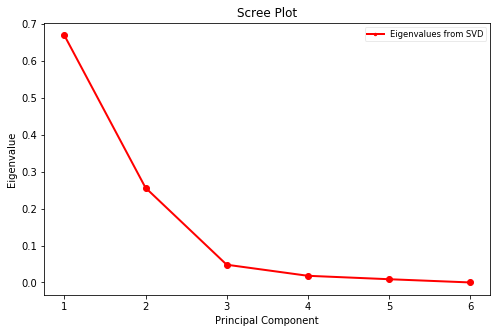

In [10]:
# 적당한 차원값 찾기 위해 scree plot 그려봄
# 이 방법은 다소 주관적일 수 있는데 2차원 plot을 그리는데
# x 축에는 dimensions, y 축에는 해당 dimension의 eigenvalue를 기재한다.
# 여기서 보면 4번째 eigenvalue부터 갑자기 꺾이는 현상이 보인다.
# 그러면 이때는 3차원까지 차원 감소를 시켜준다는 식으로 결정하는 것이 scree plot을 이용한 방법이다. 
# scree plot은 PCA외에도 많은 method에서 사용된다.

#Make a random array and then make it positive-definite
num_vars = 6
num_obs = 9
A = np.random.randn(num_obs, num_vars)
A = np.asmatrix(A.T) * np.asmatrix(A)
U, S, V = np.linalg.svd(A) 
eigvals = S**2 / np.sum(S**2)  # NOTE (@amoeba): These are not PCA eigenvalues. 
                               # This question is about SVD.

fig = plt.figure(figsize=(8,5))
sing_vals = np.arange(num_vars) + 1
plt.plot(sing_vals, eigvals, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
#I don't like the default legend so I typically make mine like below, e.g.
#with smaller fonts and a bit transparent so I do not cover up data, and make
#it moveable by the viewer in case upper-right is a bad place for it 
leg = plt.legend(['Eigenvalues from SVD'], loc='best', borderpad=0.3, 
                 shadow=False, prop=matplotlib.font_manager.FontProperties(size='small'),
                 markerscale=0.4)
leg.get_frame().set_alpha(0.4)
leg.draggable(state=True)
plt.show()

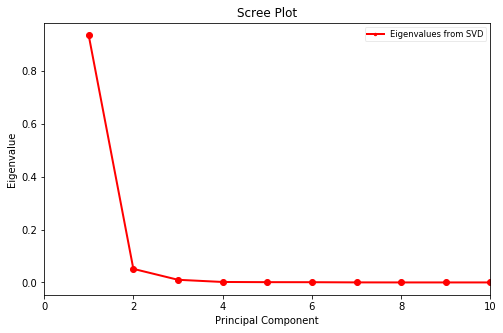

In [11]:
A = scaling_data
A = np.asmatrix(A.T) * np.asmatrix(A)
U, S, V = np.linalg.svd(A) 
eigvals = S**2 / np.sum(S**2)  # NOTE (@amoeba): These are not PCA eigenvalues. 
                               # This question is about SVD.

fig = plt.figure(figsize=(8,5))
sing_vals = np.arange(1440) + 1
plt.plot(sing_vals, eigvals, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
#I don't like the default legend so I typically make mine like below, e.g.
#with smaller fonts and a bit transparent so I do not cover up data, and make
#it moveable by the viewer in case upper-right is a bad place for it 
leg = plt.legend(['Eigenvalues from SVD'], loc='best', borderpad=0.3, 
                 shadow=False, prop=matplotlib.font_manager.FontProperties(size='small'),
                 markerscale=0.4)
leg.get_frame().set_alpha(0.4)
leg.draggable(state=True)
plt.xlim(0,10)
plt.show()

In [12]:
eigvals

array([9.34281243e-01, 5.13322470e-02, 1.00651515e-02, ...,
       8.65952300e-33, 1.58827618e-33, 4.34734511e-34])

1440 -> 2는 너무 많이 버리는데?  
모든 eingen vec.를 다 더해보자 -> 두드러지는 vec.가 없을 수 있다.

In [13]:
model_pca = PCA(n_components=1).fit(scaling_data)

In [14]:
reduced_data = model_pca.transform(scaling_data)
reduced_data.shape

(365, 1)

No handles with labels found to put in legend.


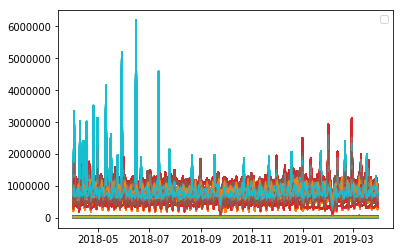

In [15]:
# PCA 전 일단위 feature값
plt.plot(data)
plt.legend()

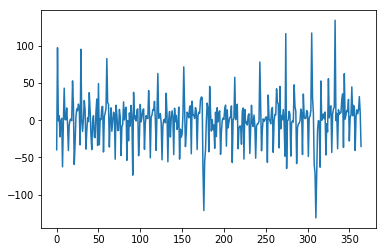

In [16]:
# PCA 후
plt.plot(reduced_data)

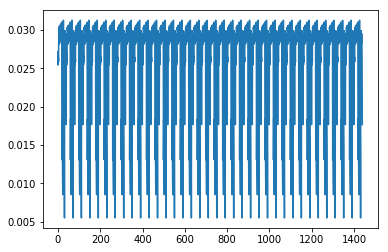

In [17]:
#model_pca.components_로 변한 feature값을 볼 수 있다. 원래 값의 비율도 볼 수 있다.

plt.plot(model_pca.components_[0])

# plt.xlim(0,100)
plt.show()

In [18]:
sum(eigvals)

1.0

In [ ]:
a = model_pca.components_[0]

In [ ]:
a.max()

In [ ]:
(a-a.mean())/a.std()

In [ ]:
a/a.sum()

In [ ]:
plt.hist(model_pca.components_[0])

In [ ]:
model_pca.components_[0].min()

In [ ]:
data['f_CNT35057065']

In [ ]:
# PCA를 이용해 뽑은 주요 벡터와 원래 feature값의 코사인 유사도를 계산해서 주요 성분을 뽑아보자
for i in data.columns:
    cos_d = i
reduced_data

아무것도 나오지 않았다!
미세먼지 끼어서 보자

In [ ]:
sum(model_pca.components_[0])

In [ ]:
with open("final_jongro.pickle","rb") as fr:
    jongro = pickle.load(fr)
print(jongro)

In [ ]:
jongro.head()

In [ ]:
list(set(jongro['serial']))

In [ ]:
jong_mno = ['V10O1610252', 'V10O1610544', 'V10O1610545', 'V10O1610567', 'V10O1611289', 'V10O1611172', 'V10O1611634', 'V10O1611887','V10O1611639',
            'V10O1611658', 'V10O1612113', 'V10O1611750', 'V10O1611170', 'V10O1611684', 'V10O1611220', 'V10O1612106', 'V10O1611251', 
            'V10O1611173', 'V10O1611258', 'V10O1611255', 'V10O1611722', 'V10O1611645']

In [ ]:
len(jong_mno)

PCA로는 데이터 분산의 중요한 vec.만 뽑을 수 있다.  
원래 내 의도는 y값에 대해 중요한 feature값을 뽑기  
다른 방법을 이용하자

D.T.의 importance_를 이용하면   
y값에 대해 중요한 feature값을 뽑아 볼 수 있다.  

D.T.는 entropy가 작아지는 방향으로 조건문 만들어서 분리  
맨처음 등장하는 조건문에 이용된 feature값이 제일 중요한 feature  

staion 30개에 대해서 모두 해보자

for i in list(set(jongro['serial'])):
    print(i)
    print(len(jongro.loc[jongro['serial'] == i]))
    
    

In [104]:
with open("pca_card_data","rb") as fr:
    data = pickle.load(fr)
print(data)

            f_CNT35057065  f_AMT35057065  m_CNT35057065  m_AMT35057065  \
STD_DD                                                                   
2018-04-01           7567         228766          12723         388071   
2018-04-02          19392         893713          25402        1172022   
2018-04-03          15005         594205          21476         807775   
2018-04-04          15068         579159          21689         860339   
2018-04-05          12340         514633          18730         737513   
2018-04-06          13435         502218          20246         757730   
2018-04-07          11151         414453          17009         612769   
2018-04-08           6867         235177          11601         406029   
2018-04-09          15017         513028          22209         836515   
2018-04-10          16921         663361          22872         944244   
2018-04-11          14634         571499          20940         774593   
2018-04-12          14152         5930

In [ ]:
with open("final_jongro.pickle","rb") as fr:
    jongro = pickle.load(fr)
print(jongro)

In [46]:
temp = [len(jongro.loc[jongro['serial']==i]) for i in list(set(jongro['serial']))]

In [ ]:
list(set(jongro['serial']))

In [49]:
sum(np.array(temp))

9836

In [25]:
jong_170 = jongro.loc[jongro['serial'] == 'V10O1611170']
a = list(jong_170['pm10_class'])
data['pm10_class'] = a

In [30]:
data.head()

,f_CNT35057065,f_AMT35057065,m_CNT35057065,m_AMT35057065,f_CNT35057035,f_AMT35057035,m_CNT35057035,m_AMT35057035,f_CNT35057040,f_AMT35057040,...,m_AMT35070025,f_CNT35070060,f_AMT35070060,m_CNT35070060,m_AMT35070060,f_CNT35070030,f_AMT35070030,m_CNT35070030,m_AMT35070030,pm10_class
STD_DD,,,,,,,,,,,,,,,,,,,,,
2018-04-01,7567,228766,12723,388071,26058,611595,33441,815011,29226,737080,...,920819,9159,286433,11444,359650,28399,673711,35379,723736,1
2018-04-02,19392,893713,25402,1172022,46880,1702042,47971,1410355,49872,1904040,...,788629,24250,1246973,21458,1014566,40832,1037756,41881,940270,1
2018-04-03,15005,594205,21476,807775,35046,832062,39997,929467,34376,872640,...,723691,14373,643535,15429,567573,36393,753040,38182,656647,1
2018-04-04,15068,579159,21689,860339,37921,839686,40186,978052,38586,945175,...,720869,14142,528612,15500,517330,37251,783996,37672,741131,0
2018-04-05,12340,514633,18730,737513,31656,769812,35739,830970,31232,772174,...,719807,12468,449397,13790,443730,32993,640604,34475,722334,0


In [8]:
from sklearn.tree import DecisionTreeClassifier

In [92]:
model = DecisionTreeClassifier(criterion='entropy',  min_samples_leaf=3,
                                                      max_features="sqrt", random_state=0)
model_tree = model.fit(data.iloc[:,:-1], data.iloc[:,-1])

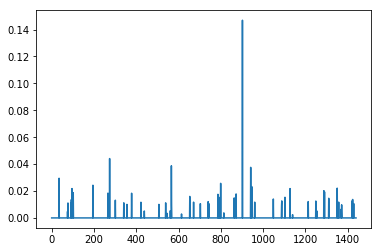

In [93]:
plt.plot(model_tree.feature_importances_)

35 m_AMT35057060
274 m_CNT35061260
566 m_CNT11067035
799 m_AMT11053030
902 m_CNT35067020
941 f_AMT11070020


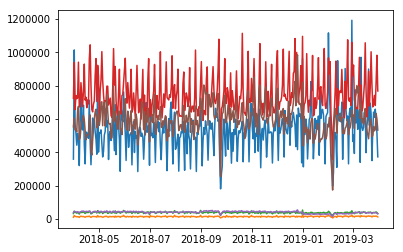

In [102]:
cnt = 0
for i in model_tree.feature_importances_:
    if i > 0.025:
        print(cnt, data.columns[cnt])
        plt.plot(data[data.columns[cnt]])
    cnt+=1
# plt.legend()
plt.show()

In [75]:
data.columns[274]

'm_CNT35061260'

In [69]:
data.columns

Index(['f_CNT35057065', 'f_AMT35057065', 'm_CNT35057065', 'm_AMT35057065',
       'f_CNT35057035', 'f_AMT35057035', 'm_CNT35057035', 'm_AMT35057035',
       'f_CNT35057040', 'f_AMT35057040',
       ...
       'm_AMT35070025', 'f_CNT35070060', 'f_AMT35070060', 'm_CNT35070060',
       'm_AMT35070060', 'f_CNT35070030', 'f_AMT35070030', 'm_CNT35070030',
       'm_AMT35070030', 'pm10_class'],
      dtype='object', length=1441)

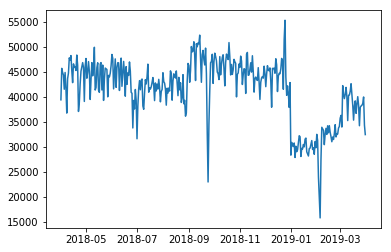

In [97]:
plt.plot(data['m_CNT35067020'])

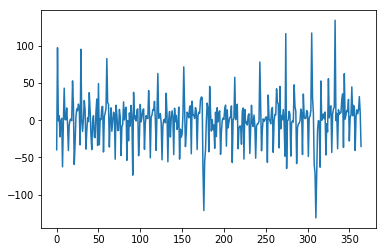

In [82]:
plt.plot(reduced_data)

In [ ]:
def D.T_func(station):
    data = 
    
    scaler = StandardScaler()
    scaler.fit(data)
    scaling_data = scaler.transform(data)
    
    

In [80]:
np.dot(temp,np.array(data['m_CNT35067020']))/(np.linalg.norm(temp)*np.linalg.norm(np.array(data['m_CNT35067020'])))

0.04901388268931283

In [79]:
temp = reduced_data.reshape(365,)

In [77]:
data['m_CNT35067020'].shape

(365,)

In [81]:
np.corrcoef(temp,np.array(data['m_CNT35067020']))

array([[1.        , 0.33476114],
       [0.33476114, 1.        ]])

PCA로 뽑은 주성분과 종로의 어떤 station을 결과로 뽑은 D.T.의 주요 feature값의 유사도를 비교해봤다  
연관성 없다! -> 전체 데이터와 미세먼지 농도는 큰 결과가 없다!  
종로의 모든 측정기 값을 평균 낸 미세먼지 농도로 D.T.해보자

In [7]:
with open("jong_totalmean","rb") as fr:
    jongro = pickle.load(fr)

with open("pca_card_data","rb") as fr:
    data = pickle.load(fr)

with open("nowon_totalmean","rb") as fr:
    nowon = pickle.load(fr)    

In [21]:
scaler = StandardScaler()
scaler.fit(data)
scaling_data = scaler.transform(data)
scaling_data

C:\ProgramData\Anaconda3\envs\finance\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\envs\finance\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


array([[-1.74478947e+00, -1.70546543e+00, -1.82427608e+00, ...,
        -5.05420220e-01, -8.49373630e-01, -2.36154779e-01],
       [ 1.85433700e+00,  2.33475392e+00,  1.31328840e+00, ...,
         2.52204807e+00,  1.01031644e+00,  1.57108907e+00],
       [ 5.19083909e-01,  5.14942691e-01,  3.41754515e-01, ...,
         1.54295012e-01, -4.76647303e-02, -7.96095401e-01],
       ...,
       [ 1.18960193e+00,  1.36973289e+00,  1.39915755e+00, ...,
         6.69583590e-02,  1.44134580e+00,  5.87869094e-01],
       [-3.80925984e-01, -4.58256638e-01, -1.96952243e-03, ...,
         9.44998591e-01,  7.96946893e-01,  1.92492774e+00],
       [-1.23984648e+00, -1.42305893e+00, -1.29594576e+00, ...,
        -8.72912764e-01, -6.91777624e-01,  1.37205739e-01]])

In [38]:
model = DecisionTreeClassifier(criterion='entropy', max_depth = 3,min_samples_leaf=3,
                                                      max_features="sqrt", random_state=0)
model_tree = model.fit(scaling_data, nowon['pm10_class'])

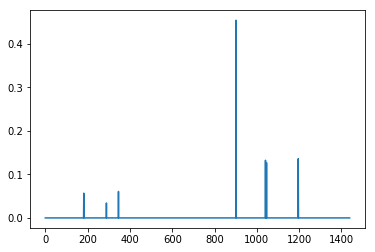

In [39]:
plt.plot(model_tree.feature_importances_)

In [34]:
for i,j in enumerate(model_tree.feature_importances_):
    if j>0.02:
        print(i, data.columns[i])

182 m_CNT11054020
289 f_AMT35059540
346 m_CNT35062155
902 m_CNT35067020
1041 f_AMT11051565
1046 m_CNT11051535
1196 f_CNT11065030


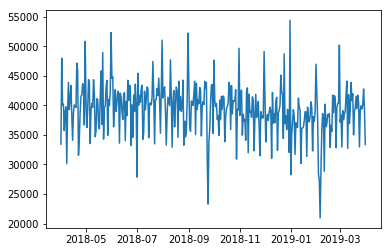

In [31]:
plt.plot(data['m_CNT35059535'])

In [ ]:
data.corr()

In [27]:
import matplotlib.pyplot as plt 
import seaborn as sns    
%matplotlib inline  

In [ ]:
data_nowon = pd.DataFrame()
data_jong = pd.DataFrame()
for i,j in enumerate(data.columns):
#     print(i,j)
    if j[5:8] == '110':
        data_jong = pd.concat([data_jong,data[j]], axis=1)
        print(j)
    elif j[5:8] == '350':
        data_nowon = pd.concat([data_nowon,data[j]], axis=1)
        print(j)


In [25]:
data_nowon.head()

,f_CNT35057065,f_AMT35057065,m_CNT35057065,m_AMT35057065,f_CNT35057035,f_AMT35057035,m_CNT35057035,m_AMT35057035,f_CNT35057040,f_AMT35057040,...,m_CNT35070025,m_AMT35070025,f_CNT35070060,f_AMT35070060,m_CNT35070060,m_AMT35070060,f_CNT35070030,f_AMT35070030,m_CNT35070030,m_AMT35070030
2018-04-01,7567,228766,12723,388071,26058,611595,33441,815011,29226,737080,...,62440,920819,9159,286433,11444,359650,28399,673711,35379,723736
2018-04-02,19392,893713,25402,1172022,46880,1702042,47971,1410355,49872,1904040,...,61723,788629,24250,1246973,21458,1014566,40832,1037756,41881,940270
2018-04-03,15005,594205,21476,807775,35046,832062,39997,929467,34376,872640,...,59478,723691,14373,643535,15429,567573,36393,753040,38182,656647
2018-04-04,15068,579159,21689,860339,37921,839686,40186,978052,38586,945175,...,58270,720869,14142,528612,15500,517330,37251,783996,37672,741131
2018-04-05,12340,514633,18730,737513,31656,769812,35739,830970,31232,772174,...,54926,719807,12468,449397,13790,443730,32993,640604,34475,722334


In [ ]:
plt.figure(figsize=(30,30))
sns.heatmap(data = data_jong.corr()[data_jong.corr()>0.8], annot=True, 
fmt = '.2f', linewidths=.5, cmap='RdBu')

In [ ]:
for i in range(680):
    if data_jong.corr()[data_jong.corr()>0.8].iloc[i].isnull().sum()/680 > 0.5:
        data_jong[data_jong.columns[i]] = np.NaN
    print(i)

In [72]:
reduce_jong = data_jong.dropna(axis=1)

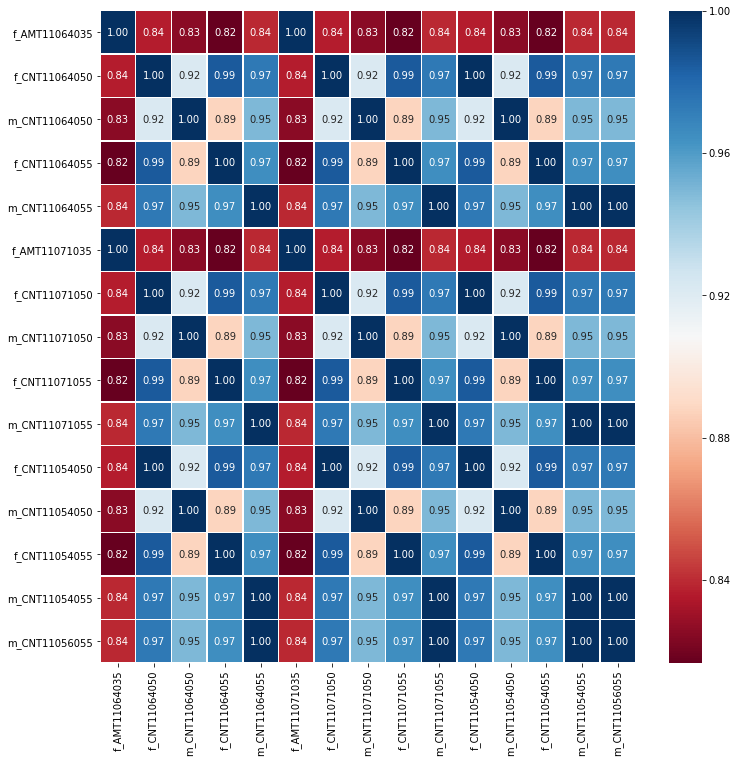

In [78]:
plt.figure(figsize=(12,12))
sns.heatmap(data = reduce_jong.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='RdBu')